In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


real    0.514404
fake    0.485596
Name: label, dtype: float64

In [5]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [3]:
df = df.dropna()

In [8]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [9]:
df.nunique()

title    62308
text     62200
label        2
dtype: int64

Text(0.5, 1.0, 'Distribution of Fake/Real News')

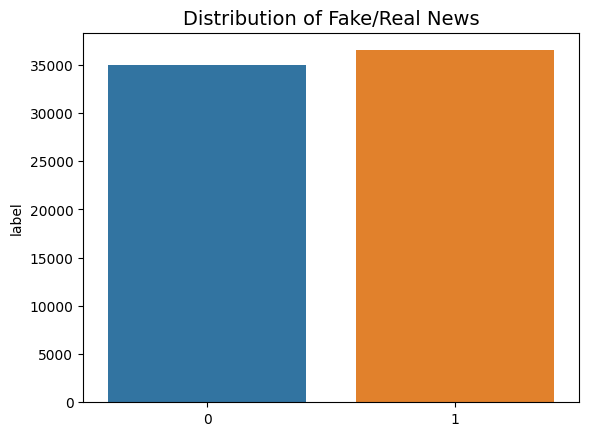

In [10]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=53)

# Data Visualization of all News Titles

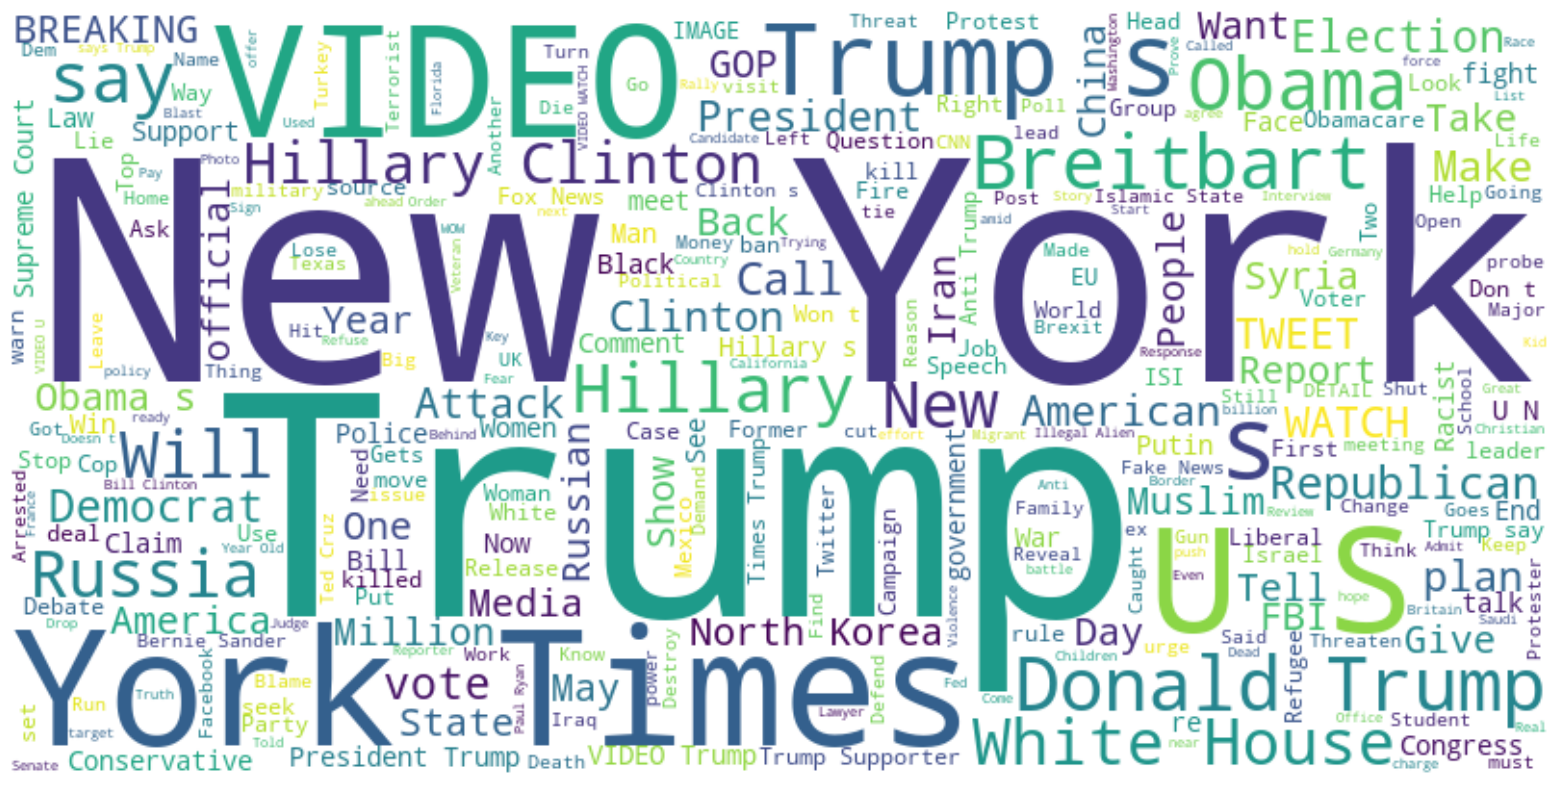

In [14]:
titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Data Visualization of texts in fake news

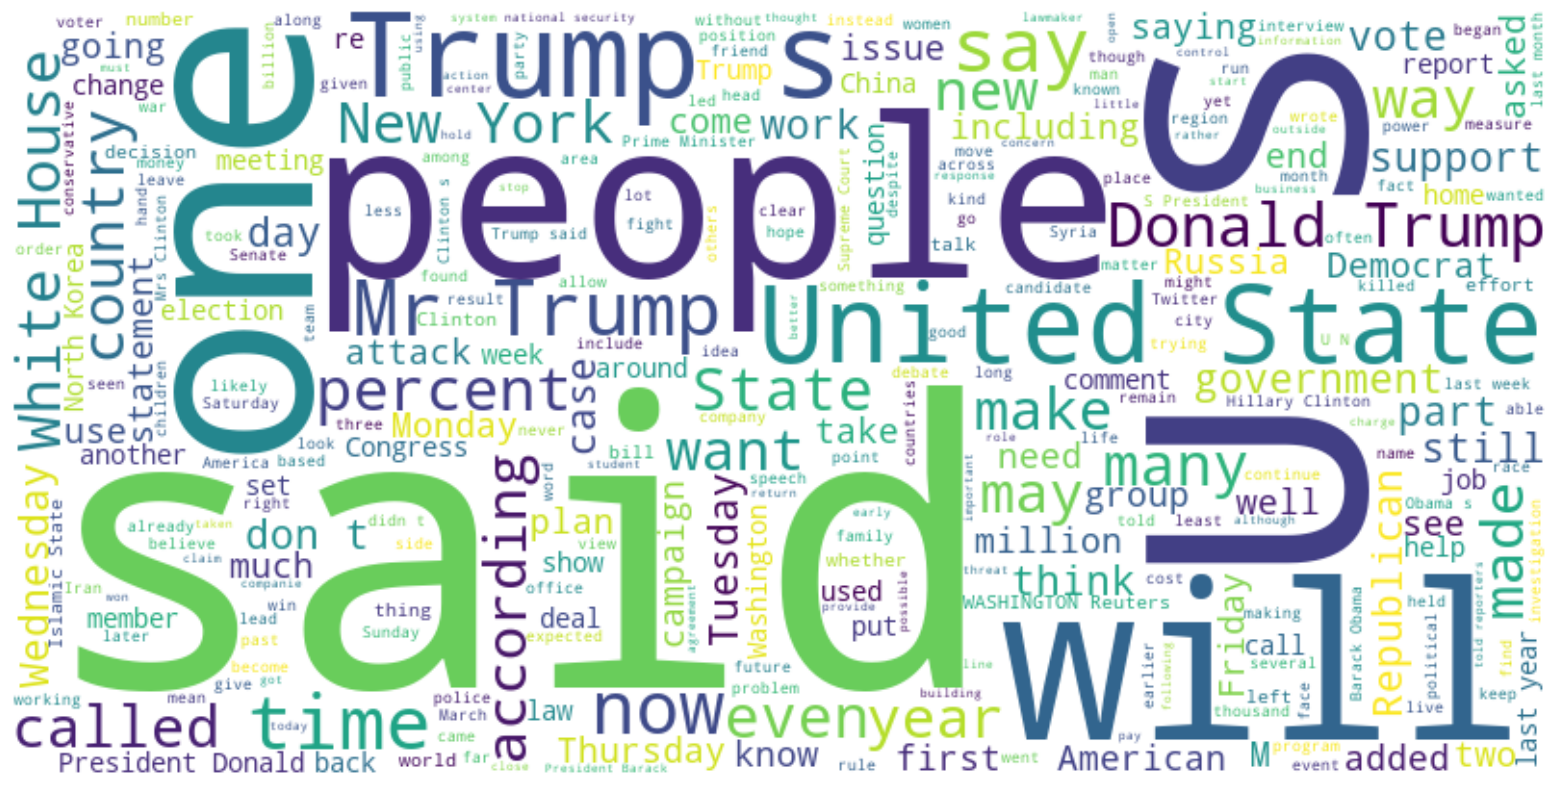

In [15]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Data Visualization of texts in Real news

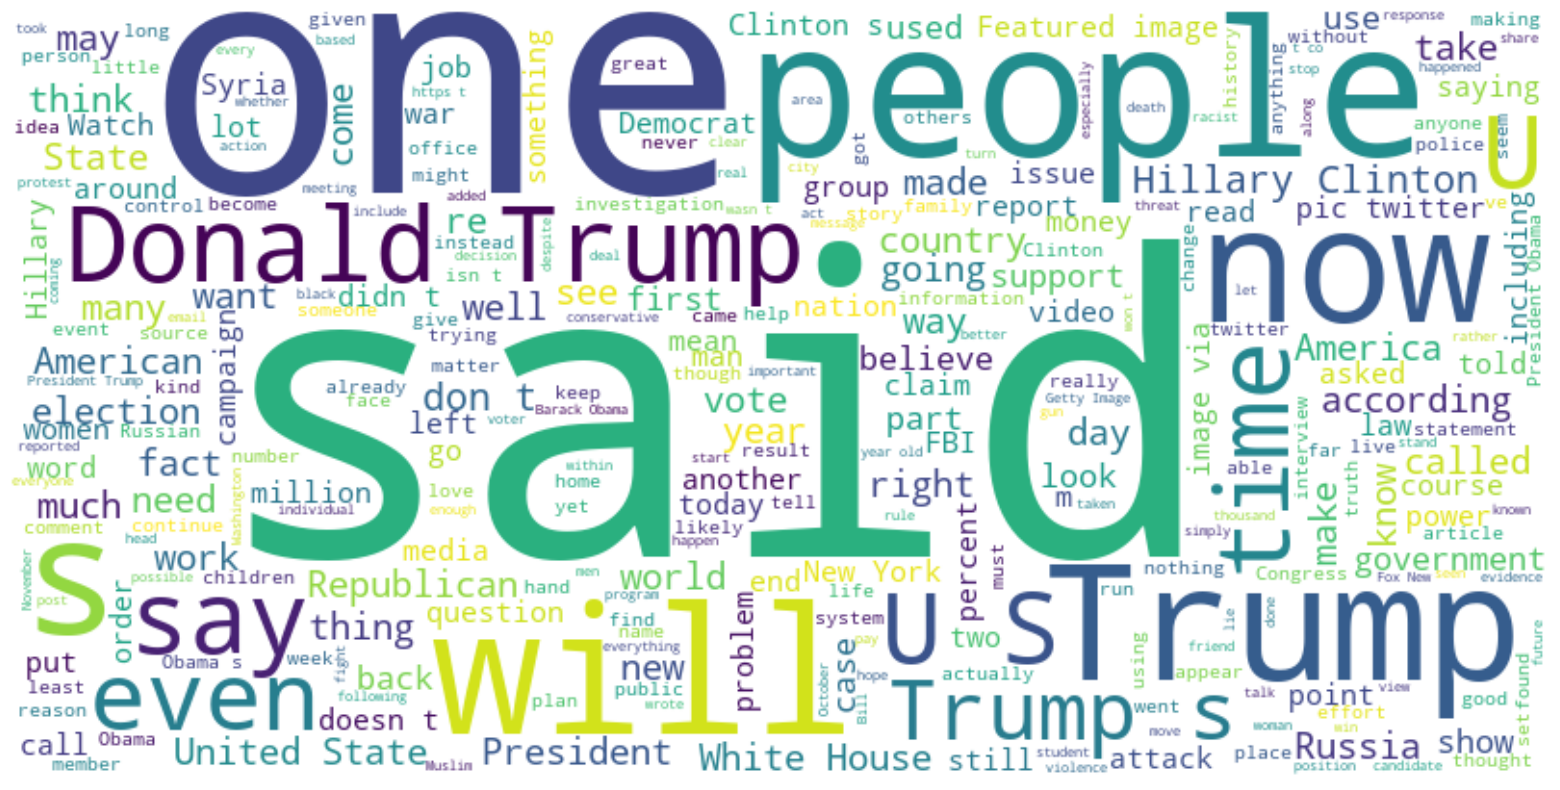

In [16]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Bag of Words Model

In [17]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB()

Predictions on NB model

In [19]:
pred = nb_classifier.predict(count_test)
pred

array([1, 1, 0, ..., 1, 0, 1])

 Evaluation of NB predictions

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11543
           1       0.91      0.87      0.89     12065

    accuracy                           0.89     23608
   macro avg       0.89      0.89      0.89     23608
weighted avg       0.89      0.89      0.89     23608



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Naive Bayes Model : 89%</b></i>
    </h3>

</div>

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)

pred2 = model.predict(count_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11543
           1       0.93      0.94      0.94     12065

    accuracy                           0.93     23608
   macro avg       0.93      0.93      0.93     23608
weighted avg       0.93      0.93      0.93     23608



<div style = "height: 65px;
  width: 800px;
  border:5px inset red;
  background-color: #e2e1e9;">
    <h3 style="
              color:black;
               text-align: center;
               ">
        <i><b>Accuracy achieved using Random Forest Model : 94%</b></i>
    </h3>

</div>

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_d

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

le = WordNetLemmatizer()

In [ ]:
datas = []

for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df["text"][i])
    review = review.lower()
    review = review.split()
    
    review = [le.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = " ".join(review)
    datas.append(review)

In [ ]:
datas

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv= TfidfVectorizer()

x = tv.fit_transform(datas).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df['label'], test_size=0.3, random_state=0,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegerssion

lr = LogisticRegerssion()
lr.fit(X_train,y_train)

lr_ans = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuray_score

score = accuracy_score(Y_test,lr_ans)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
svc_ans = svc.predict(X_test)
score = accuracy_score(Y_test,svc_ans)

In [ ]:
input_news =[]

input_news = tv.transform(input_news).toarray()
prediction = svc.predict(input_news)
print(prediction)

if prediction[0]==0:
    print("Given news is Fake News")
else:
    print("Given news is Real News")